# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch

# Creating Moons and plotting

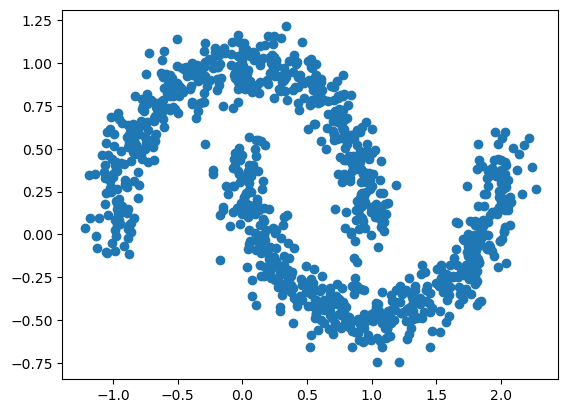

In [2]:
moons = make_moons(n_samples = 1000, noise = .1, random_state = 42)[0]
plt.scatter(moons[:,0],moons[:,1])

## Plotting using SNS for science

<AxesSubplot: >

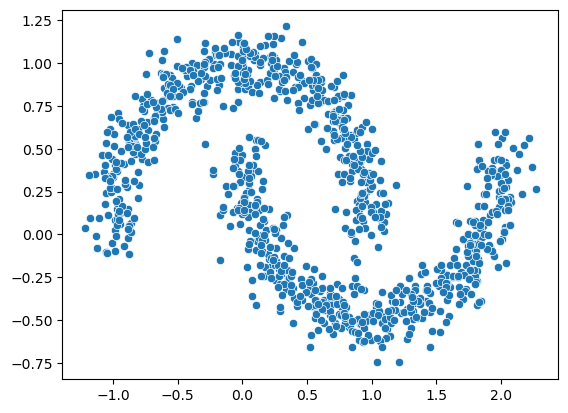

In [3]:
sns.scatterplot(data = moons, x = moons[:,0], y = moons[:,1])

# Scaling data

<AxesSubplot: >

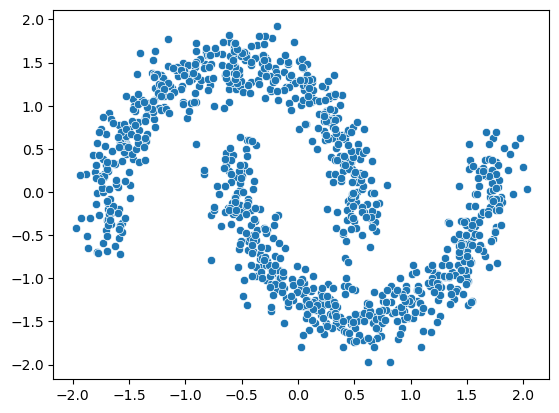

In [4]:
scaler = StandardScaler()
moons = scaler.fit_transform(moons)
sns.scatterplot(data = moons, x = moons[:,0], y = moons[:,1])

# Using DBSCAN

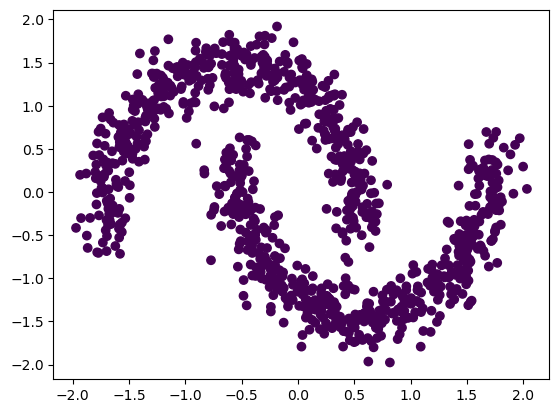

In [5]:
db = DBSCAN(min_samples=30)
db.fit(moons)
plt.scatter(moons[:,0],moons[:,1], c = db.labels_)

First pass with 30 min samples it fit it all into one cluster. Lets optimize for epsilon now. We will use NearestNeighbors to get an idea of distance between points for eps

In [6]:
neighbors = NearestNeighbors(n_neighbors=30)
neighbors.fit(moons)
# This stores the distances in a numpy array for each of the neighbors, for each point
distances, i = neighbors.kneighbors(moons)
distances

array([[0.        , 0.02230357, 0.04586937, ..., 0.29633694, 0.3107646 ,
        0.3189059 ],
       [0.        , 0.03868558, 0.03944988, ..., 0.22063801, 0.22119661,
        0.22242699],
       [0.        , 0.08763894, 0.09242477, ..., 0.3460218 , 0.36175583,
        0.3718598 ],
       ...,
       [0.        , 0.05705804, 0.06629718, ..., 0.21918621, 0.22112779,
        0.22525563],
       [0.        , 0.05444473, 0.06455353, ..., 0.23129806, 0.24656288,
        0.24723813],
       [0.        , 0.02047897, 0.02871319, ..., 0.15840089, 0.1746401 ,
        0.179713  ]])

In [10]:
# here we are slicing the np array to get the largest distance.
distances[:,29][:5]

array([0.3189059 , 0.22242699, 0.3718598 , 0.34914944, 0.19111925])

In [11]:
sorted_distances = np.sort(distances[:,29])
sorted_distances[:5]

array([0.14650369, 0.14797938, 0.14803976, 0.15245298, 0.15395415])

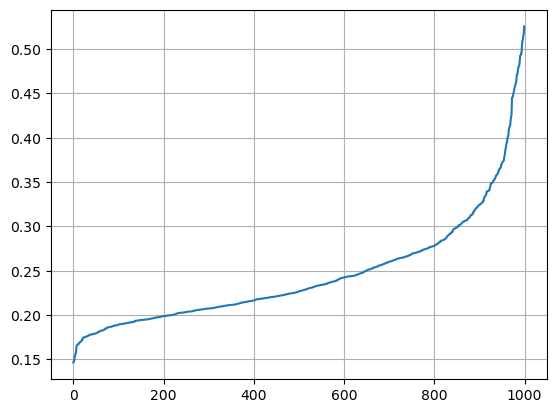

In [12]:
# Now to plot them
plt.plot(sorted_distances)
plt.grid();

We are looking for Elbows. Here we see an elbow around .3, so lets use eps = .3

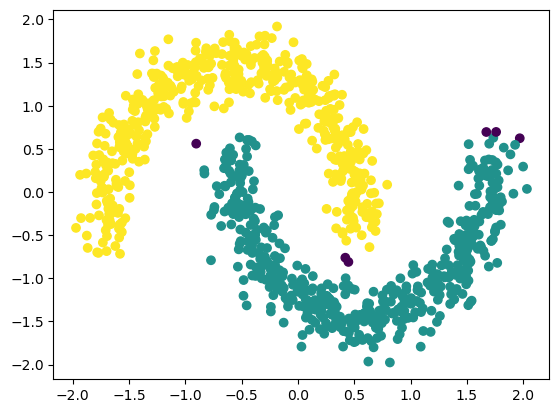

In [13]:
dbfix = DBSCAN(eps=.3,min_samples=30)
dbfix.fit(moons)
plt.scatter(moons[:,0],moons[:,1], c = dbfix.labels_)

For fun, I also saw an inflection point around .17. Lets try it

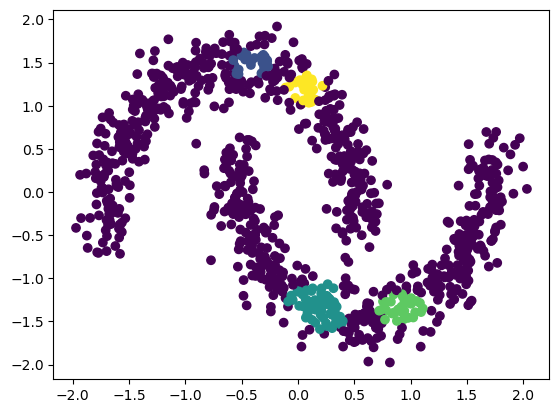

In [14]:
dbfix2 = DBSCAN(eps=.17,min_samples=30)
dbfix2.fit(moons)
plt.scatter(moons[:,0],moons[:,1], c = dbfix2.labels_)

That didn't work, we can keep .3

# Agglomerative Clustering

## Creating a Dendrogram
We are going to create a Dendrogram to visualize the number of clusters needed for Agglomerative Clustering

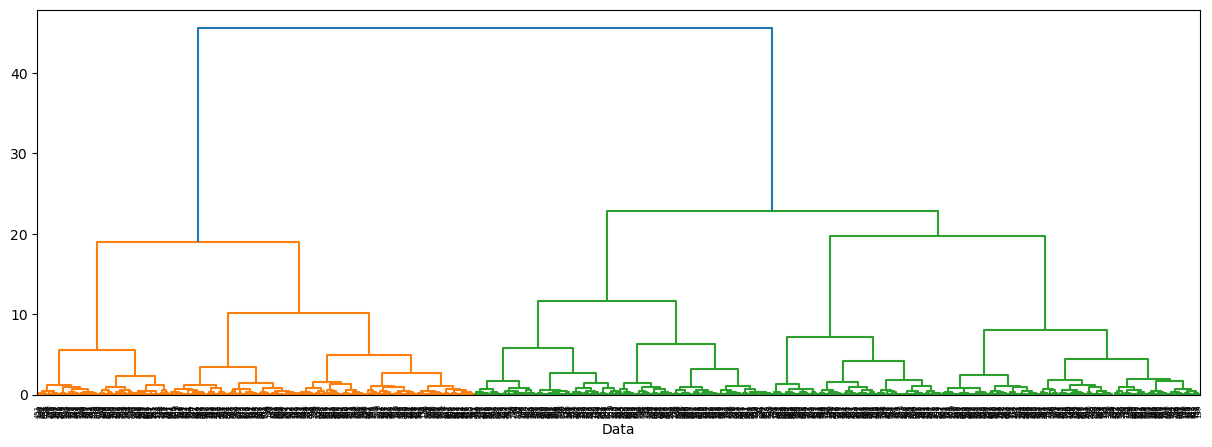

In [18]:
plt.figure(figsize = (15,5))
sch.dendrogram(sch.linkage(moons, method = 'ward'))
plt.xlabel('Data');

According to this dendrogram, the best clusters is 2. Lets create that and graph the results

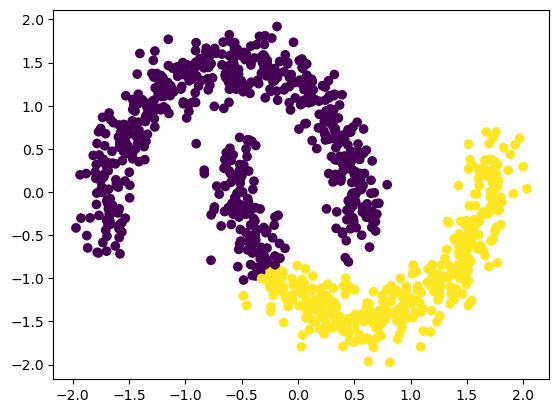

In [21]:
agglo = AgglomerativeClustering(n_clusters = 2)
agglo.fit(moons)
plt.scatter(moons[:,0],moons[:,1],c = agglo.labels_)

DBSCAN was a better fit for this dataset. It requires more tuning but it worked better to group this data